In [7]:
import pandas as pd
#file_path = "C:/Users/franc/Desktop/IntroCS_Project2-master/IntroCS_Project2-master/Code/Adjgit.csv"
file_path = 'C:\\Users\\franc\\Desktop\\IntroCS_Project2-master\\IntroCS_Project2-master\\Code\\Adjgit.csv'

df_a = pd.read_csv(file_path,header=None)

Poisson Distribution fit: chi_squared=29.1108579234, p=0.0155639209,lambda=4.8625182304
Power law Distribution fit: chi_squared=0.1689828298, p=1.0000000000, alpha=1.2844989400
[2.38539725e+02 1.15990376e+03 2.82002660e+03 4.57081025e+03
 5.55641204e+03 5.40363097e+03 4.37920902e+03 3.04199767e+03
 1.84897114e+03 9.98961764e+02 4.85746979e+02 2.14723049e+02
 8.70078950e+01 3.25444212e+01 1.13034172e+01 5.21130610e+00]


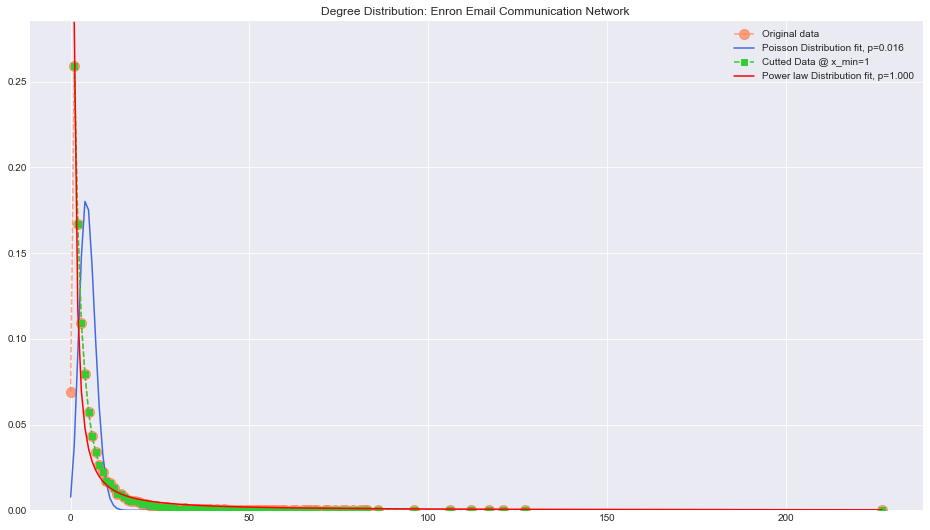

In [98]:
#given a value s and an array, finds the index of the element which is the nearest to s
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

#selfmade power law distribution (normalized), with support (x_min,+inf)
def powpow(x,a,x_min): #selfmade power law distribution (normalized), with support (x_min,+inf)
    if a<0:
        print("only negative powers allowed! (stoopid)") 
    if x_min<=0:
        print("only positive x_min allowed! (stoopid)")
    else:
        return (a-1)/(x_min) * 1/np.power(x/x_min,a)


    
# fitPois estimes the parameter lambda of the power law distriburion with ML method and does a goodness of fit test  
# NB: x_max must be inserted
def fitPois(adj_data):
    
    # observed relative frequencies are calculated and estime of lambda
    s = adj_data.sum(axis = 0, skipna = True)
    lbd=np.mean(s)
    f_unique_elements, f_counts_elements = np.unique(s, return_counts=True)
    observed = f_counts_elements/sum(f_counts_elements)
    x = f_unique_elements
    
    #cut-off of the tail: all data grater then x_max are included in the same class in the chisquared test
    x_max=15
    cut = find_nearest(x,x_max)
    observedcut = np.append(observed[0:cut],observed[cut:].sum())
    
    #expected frequencies are computed and chi squared test is performed
    expected = poisson.pmf(x, lbd, 0)
    expectedcut=np.append(expected[0:cut],expected[cut:].sum())
    chi_statistic, p_value = chisquare(observedcut, expectedcut)
    
    #plots
    print("Poisson Distribution fit: chi_squared=%.10f, p=%.10f,lambda=%.10f"%(chi_statistic, p_value, lbd))
    plt.figure(figsize=(16,9))
    plt.title("Degree Distribution: Enron Email Communication Network ")#propriet rete
    plt.ylim(0, max(observed)*1.1)
    plt.plot(x,observed,label="Original data",markersize=10,alpha=.7,marker='o',color='coral',ls='--')
    plt.plot(x,poisson.pmf(x,lbd,0),label="Poisson Distribution fit, p=%.3f"%(p_value),color='royalblue')
    plt.legend(fontsize=12)

# fitPow estimes the parameter alpha of the power law distriburion with ML method and does a goodness of fit test 
# NB: x_min is not estimated but must be inserted
def fitPow(adj_data):
    
    # observed relative frequences are calculated
    s = adj_data.sum(axis = 0, skipna = True)
    f_unique_elements, f_counts_elements = np.unique(s, return_counts=True)
    observed = f_counts_elements/sum(f_counts_elements)
    
    #cut-off of first observations up to x_min 
    x_min=1
    x = f_unique_elements
    cut = find_nearest(x,x_min)
    x = x[cut:]
    observed = observed[cut:]
    
    #estime of parameter alpha
    len_x=len(x)
    ln_x=np.log(x)
    for i in range (0,len_x):
        ln_x[i]=ln_x[i]/x_min
    alpha=len_x/sum(ln_x)+1
    
    #cut-off of the tail: all data grater then x_max are included in the same class in the chisquared test
    x_max=15
    cut = find_nearest(x,x_max)
    observedcut = np.append(observed[0:cut],observed[cut:].sum())
    
    #expected relative frequencies are calculated and chisquared test is performed 
    expected = powpow(x, alpha,x_min) 
    expectedcut=np.append(expected[0:cut],expected[cut:].sum())
    chi_stat, p_val = chisquare(observedcut, expectedcut)
    
    #plots
    print("Power law Distribution fit: chi_squared=%.10f, p=%.10f, alpha=%.10f"%(chi_stat, p_val, alpha))
    plt.plot(x,observed,label="Cutted Data @ x_min=%d"%(x_min),marker='s',ls='--',color='limegreen')    
    plt.plot(x,powpow(x,alpha,x_min),label="Power law Distribution fit, p=%.3f"%(p_val),color='r')
    plt.legend()

fitPois(df_a)
fitPow(df_a)
print (expectedcut*30855)